原文代码作者：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.6

代码全部测试通过。
![gongzhong](../gongzhong.jpg)

# 第2章 感知机

二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

## 正式开始前 我将需要用到的code做下说明
廖睿力 20181227

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
iris数据集
</td></tr></table>

Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
# 先看一下是不是一共有150个数据
print(len(iris.data))

150


In [2]:
# 具体样子  只看前10个
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [3]:
# 对应的分类
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
封装到DataFrame里
</td></tr></table>

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target    # 添加新的一列

# 看一下前10个
df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
# 看看各个label分别有多少数据
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
df.iloc的用法
</td></tr></table>

In [6]:
# 对行切片 取前10行
df.iloc[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
# 对列切片  取前行和前2列
df.iloc[:10,:2]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [8]:
# 取两个特征 和类别
df.iloc[:10, [0, 1, -1]]

,sepal length (cm),sepal width (cm),label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


## 以下开始为正式代码

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

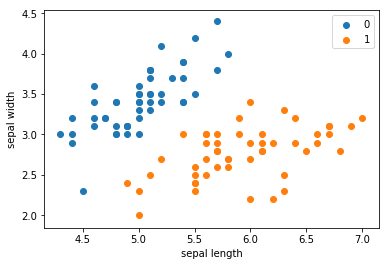

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [12]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

## Perceptron

In [13]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)   # 初始化系数为0
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
        


In [14]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

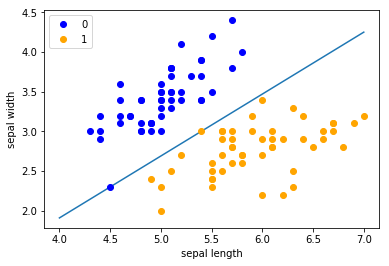

In [15]:
x_points = np.linspace(4, 7,10)

y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]  # 根据w1*x + w2*y + b = 0反解出来
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn Perceptron

In [16]:
from sklearn.linear_model import Perceptron

In [17]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [18]:
# Weights assigned to the features.
print(clf.coef_)

[[  74.6 -127.2]]


In [19]:
# 截距 Constants in decision function.
print(clf.intercept_)

[ 0.]


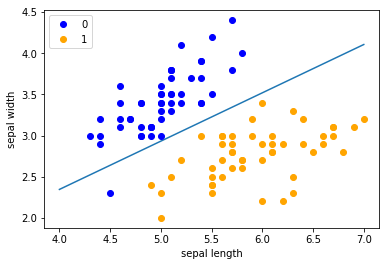

In [20]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 关于凸壳
——廖睿力

设集合$S\subset R^n$中的$k$个点所组成的集合，即$S=\{x_1,x_2,...,x_k\}$.定义$S$的凸壳$conv(S)$为:
$$conv(S)=\{x=\sum_{i=1}^{k}\lambda_ix_i \bracevert \sum_{i=1}^k\lambda_i=1,\lambda\ge0\}$$
接下来我们探究一下3个二维点的凸壳

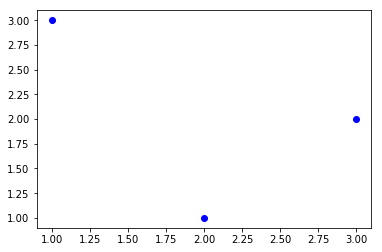

In [21]:
# 选定3个点
x = [1,2,3]
y = [3,1,2]
plt.plot(x, y,"bo")
plt.show()

In [22]:
# 封装起来
origin_points = pd.DataFrame(list(zip(x,y)))
origin_points

,0,1
0,1,3
1,2,1
2,3,2


In [23]:
# 随机生成分割点
import random

def poinst_1(n):
    list1 = [random.random() for i in range(n-1)]
    list1.sort()
    list2=[list1[0],]
    for i in range(1,n-1):
        list2.append(list1[i]-list1[i-1])
    
    list2.append(1-list1[-1])
    return list2
    
poinst_1(10)


[0.14635292951366896,
 0.07835998426261048,
 0.03218102397263456,
 0.1448053366418539,
 0.09315698270057371,
 0.23223630317594257,
 0.12134497448961412,
 0.014362552738499512,
 0.06499221747494144,
 0.07220769502966073]

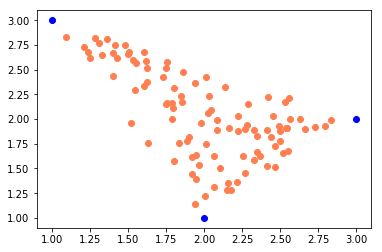

In [24]:
# 随机来100次
def conv(n):
    X,Y=[],[]
    for i in range(n):
        x_, y_ = np.dot(poinst_1(3),origin_points)
        X.append(x_)
        Y.append(y_)
    
    plt.plot(X, Y,"bo",color='coral')
    plt.plot(x, y,"bo")
    plt.show()

conv(100)

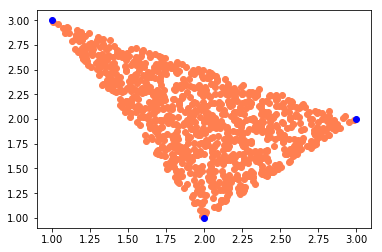

In [25]:
# 随机来1000次
conv(1000)

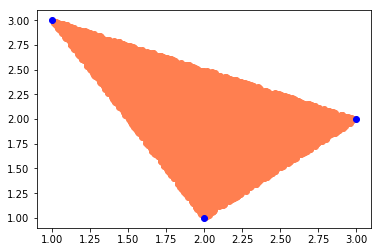

In [26]:
# 随机来10000次
conv(10000)